In [4]:
slope, intercept, r, p, std_err

(-1.7512877115526118,
 103.10596026490066,
 -0.758591524376155,
 0.002646873922456106,
 0.453536157607742)

In [5]:
# 开始预测
speed = myfunc(10)
print(speed)

85.59308314937454


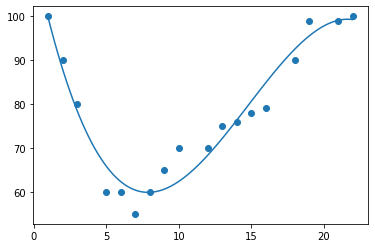

In [21]:
# 多元线性拟合
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
# 三次函数
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


In [7]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
# 计算拟合的结果r
print(r2_score(y, mymodel(x)))
# 计算预测值
speed = mymodel(17)
print(speed)

0.9432150416451026
88.87331269698001


In [14]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

# 预测重量为 2300kg、排量为 1300ccm 的汽车的二氧化碳排放量：
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
# 'Weight', 'Volume'的值 拟合的系数
print(regr.coef_)
# 这些值告诉我们，如果重量增加 1g，则 CO2 排放量将增加 0.00755095g。
# 如果发动机尺寸（容积）增加 1 ccm，则 CO2 排放量将增加 0.00780526g。

[107.2087328]
[0.00755095 0.00780526]


In [19]:
# 再次预测
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)


[114.75968007]


In [22]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
# Python sklearn 模块有一个名为 StandardScaler() 的方法，该方法返回带有转换数据集方法的 Scaler 对象。处理后的数据聚集在均值为0的附近，标准差为1
scale = StandardScaler()
df = pandas.read_csv("cars.csv")
# 缩放 Volume 1000倍
df['Volume'] = df['Volume'] / 1000
X = df[['Weight', 'Volume']]
y = df['CO2']
# 返回带有转换数据集方法的 Scaler 对象。 归一化和标准化的类 在同一个数量级比较
# X.values的均值和标准差，并应用在X.values上。
scaledX = scale.fit_transform(X.values)
# print(scaledX)
regr = linear_model.LinearRegression()
regr.fit(scaledX, y)
# 这个transform用的和上一个是同一个标准差，保持数据的一致性 数据返回这个转化好的数据列表
scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])

print('%.2f' % predictedCO2)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]
107.21


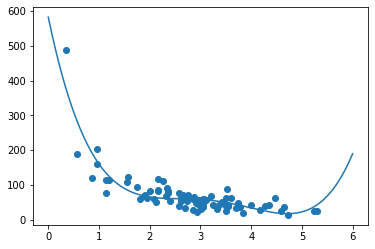

In [41]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)
# 我们的数据集展示了商店中的 100 位顾客及其购物习惯。x 轴表示购买前的分钟数。y 轴表示在购买上花费的金额。
# loc为平均值，scale此概率分布的标准差，
x = numpy.random.normal(loc=3,scale= 1,size= 100)
y = numpy.random.normal(loc=150,scale= 40,size= 100) / x
# 取到第80
train_x = x[:80]
train_y = y[:80]
# 从第80开始
test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, deg=4))
# 用于在线性空间中以均匀步长生成数字序列。
myline = numpy.linspace(0, 6,1000)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))

plt.show()

In [42]:
# 查看查看训练拟合程度R方
from sklearn.metrics import r2_score
r2 = r2_score(train_y, mymodel(train_x))
print(r2)
# 查看测试的分数
r3 = r2_score(test_y, mymodel(test_x))
print(r3)

0.7988645544629797
0.8086921460343581


In [69]:
# 如果购买客户在商店中停留 5 分钟，她将花费多少钱？
print(mymodel(5))

22.87962591811811


In [37]:
from sklearn.metrics import accuracy_score
import pandas
from sklearn.preprocessing import StandardScaler
# Python sklearn 模块有一个名为 StandardScaler() 的方法，该方法返回带有转换数据集方法的 Scaler 对象。处理后的数据聚集在均值为0的附近，标准差为1
# scale = StandardScaler()
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)
# 我们的数据集展示了商店中的 100 位顾客及其购物习惯。x 轴表示购买前的分钟数。y 轴表示在购买上花费的金额。
# loc为平均值，scale此概率分布的标准差，
x = numpy.random.normal(loc=3,scale= 1,size= 100)
y = numpy.random.normal(loc=150,scale= 40,size= 100) / x
''' 将 y 转换成 列 '''
import numpy as np
# len(y)是行，1是列
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)
'''引入标准化函数'''
from sklearn import preprocessing
# 将数据的每一个特征缩放到给定的范围
x_MinMax = preprocessing.MinMaxScaler()
y_MinMax = preprocessing.MinMaxScaler()
'''标准化'''
x = x_MinMax.fit_transform(x)
y = y_MinMax.fit_transform(y)
# 取到第80
train_x = x[:80]
train_y = y[:80]
# 从第80开始
test_x = x[80:]
test_y = y[80:]

fitting model right now
Train ERROR =  0.007168881126219264
Test ERROR =  0.0016197766356088792


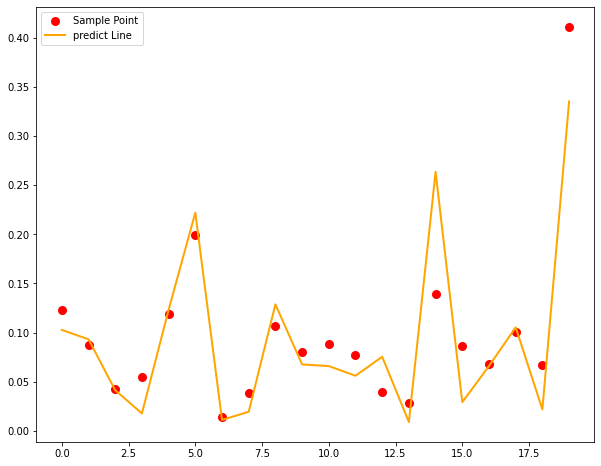

In [54]:
from sklearn.neural_network import MLPRegressor
fit1 = MLPRegressor(
    hidden_layer_sizes=(100,50), activation='relu',solver='adam',
    # '''第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam'''
    alpha=0.01,max_iter=200)
# '''惩罚系数为0.01，最大迭代次数为200'''
print ("fitting model right now")
# .ravel()可以把列向量转化为一个一维数组
fit1.fit(train_x,train_y.ravel())
pred1_train = fit1.predict(train_x)
'''计算训练集 MSE'''
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(pred1_train,train_y)
print ("Train ERROR = ", mse_1)
'''计算测试集mse'''
pred1_test = fit1.predict(test_x)
mse_2 = mean_squared_error(pred1_test,test_y)
print ("Test ERROR = ", mse_2)
'''结果可视化'''
import matplotlib.pyplot as plt
xx=range(0,len(test_y))
train_xx=range(0,len(pred1_train))
# figsize 设置显示的长，宽
plt.figure(figsize=(10,8))
plt.scatter(xx,test_y,color="red",label="Sample Point",linewidth=3)
plt.plot(xx,pred1_test,color="orange",label="predict Line",linewidth=2)
# plt.plot(train_xx,pred1_train,color="red",label="Fitting Line",linewidth=3)
plt.legend()
plt.show()

In [55]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(pred1_test,test_y)
print('evs: %.2f%%'%(score*100.0))

evs: 78.43%


In [60]:
# 测试一个预测值
my_xtest=[5.0]
my_xtest = np.array(my_xtest).reshape(len(my_xtest),1)
'''引入标准化函数'''
from sklearn import preprocessing
# 将数据的每一个特征缩放到给定的范围
x_MinMax = preprocessing.MinMaxScaler()
my_xtest = x_MinMax.fit_transform(my_xtest)
my_test_predict = fit1.predict(my_xtest)
my_test_predict

array([0.37151054])

In [ ]:
my_xtest = np.array(x).reshape(len(my_xtest),1)
'''引入标准化函数'''
from sklearn import preprocessing
# 将数据的每一个特征缩放到给定的范围
x_MinMax = preprocessing.MinMaxScaler()
my_xtest = x_MinMax.fit_transform(my_xtest)
my_xtest

In [15]:
# scaledX = scale.fit_transform(mldata_x.values)

#划分训练集和测试集合
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(mldata_x, mldata_y, test_size = 0.3, random_state = 5)
# X_train, X_test, y_train, y_test = train_test_split(scaledX, mldata_y, test_size = 0.2, random_state = 10)

from sklearn.neural_network import MLPClassifier
# solver 权重优化器  alpha 正则化项参数
# learning_rate :学习率,用于权重更新,只有当solver为’sgd’时使用，{‘constant’，’invscaling’, ‘adaptive’},默认constant
mp= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
mp.fit(train_x.ravel(), train_y.ravel())
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
              solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Predict = mp.predict(test_x)
mp_Score = accuracy_score(test_y,Predict)
mp_Score

ValueError: Expected 2D array, got 1D array instead:
array=[2.58324215 2.94373317 0.8638039  4.64027081 1.20656441 2.15825263
 3.50288142 1.75471191 1.94204778 2.09099239 3.55145404 5.29220801
 3.04153939 1.88207455 3.53905832 2.4038403  2.9808695  4.17500122
 2.25212905 3.00902525 2.12189211 2.84356583 3.25657045 2.01122095
 2.66117803 2.76381597 2.36234499 1.81238771 1.57878277 2.8465048
 2.73094304 5.23136679 0.56523242 3.1127265  3.37044454 4.35963386
 3.50185721 2.1557863  3.00000976 3.54235257 2.6864918  3.77101174
 1.13190935 4.73118467 4.46767801 2.66432266 3.61134078 3.04797059
 2.17086471 3.08771022 4.00036589 2.61890748 2.62433058 2.92552924
 3.43349633 4.27837923 2.36532069 3.50839624 3.21611601 1.14138761
 2.58068352 2.8676711  2.96042976 3.32600343 0.95967695 3.04625552
 2.32232442 1.56056097 3.52429643 3.73527958 2.34674973 3.84245628
 2.61848352 3.06648901 1.90126105 4.58448706 0.34055054 2.90854738
 3.69511961 0.96653345].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.scatter(train_x, train_y)
plt.plot(test_x, Predict)
plt.show()